Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. 
Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
covid=pd.read_csv("C:/Users/Sachin/Desktop/Mrunali/novel-corona-virus-2019-dataset/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid.shape

(17049, 8)

In [4]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,17049.000000,17049.000000,17049.000000,17049.000000
mean,8525.000000,2629.945099,150.370344,650.487947
std,4921.766705,13579.287098,1185.568589,4967.680888
min,1.000000,0.000000,0.000000,0.000000
25%,4263.000000,8.000000,0.000000,0.000000
50%,8525.000000,89.000000,1.000000,1.000000
75%,12787.000000,588.000000,7.000000,55.000000
max,17049.000000,253060.000000,24114.000000,91500.000000


In [5]:
#Checking for null Values
covid.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     8553
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [7]:
#Dropping column SNo is of no use & the column Province/State contains many missing values.
covid.drop(["SNo"],1,inplace=True)

In [8]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [9]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [10]:
print("Basic Information")
print("Total number of countries with Disease spread: ",len(covid["Country/Region"].unique()))
print("Total number of confirmed cases around the world: ",datewise["Confirmed"].iloc[-1])
print("Total number of recovered cases around the world: ",datewise["Recovered"].iloc[-1])
print("Total number of deaths cases around the world: ",datewise["Deaths"].iloc[-1])
print("Total number of active cases around the world: ",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of closed cases around the world: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed cases per day around the world: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered cases per day around the world: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Deaths cases per day around the world: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed cases per hour around the world: ",np.round(datewise["Confirmed"].iloc[-1]/(datewise.shape[0]*24)))
print("Approximate number of Recovered cases per hour around the world: ",np.round(datewise["Recovered"].iloc[-1]/(datewise.shape[0]*24)))
print("Approximate number of Deaths cases per hour around the world: ",np.round(datewise["Deaths"].iloc[-1]/(datewise.shape[0]*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Deaths Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Total number of countries with Disease spread:  220
Total number of confirmed cases around the world:  2472259.0
Total number of recovered cases around the world:  645738.0
Total number of deaths cases around the world:  169986.0
Total number of active cases around the world:  1656535.0
Total number of closed cases around the world:  815724.0
Approximate number of Confirmed cases per day around the world:  27470.0
Approximate number of Recovered cases per day around the world:  7175.0
Approximate number of Deaths cases per day around the world:  1889.0
Approximate number of Confirmed cases per hour around the world:  1145.0
Approximate number of Recovered cases per hour around the world:  299.0
Approximate number of Deaths cases per hour around the world:  79.0
Number of Confirmed Cases in last 24 hours:  70880.0
Number of Recovered Cases in last 24 hours:  21835.0
Number of Deaths Cases in last 24 hours:  4942.0


In [11]:
datewise.shape[0]

90

Distribution Plot for Active Cases over Date
Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Case

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

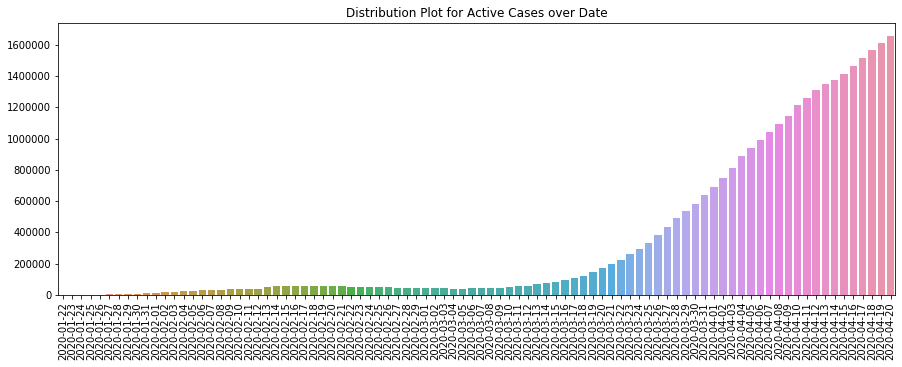

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution Plot for Active Cases over Date")
plt.xticks(rotation=90)

Distribution Plot for Closed Cases Cases over Date
Closed Cases = Number of Recovered Cases + Number of Death Cases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

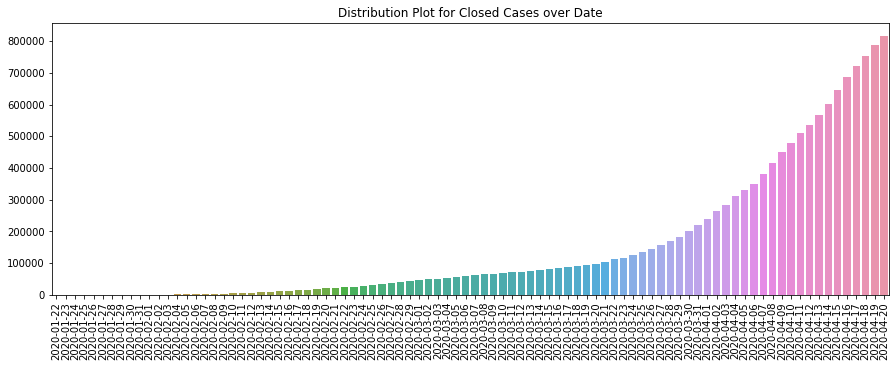

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution Plot for Closed Cases over Date")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly progress of Different Types of Cases')

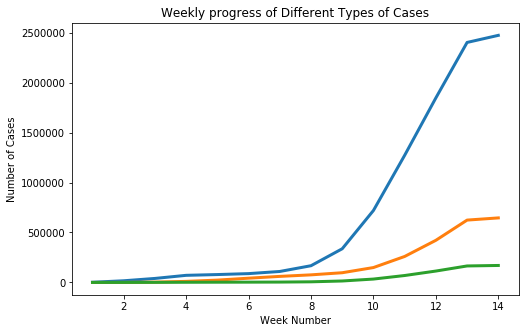

In [14]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
    
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

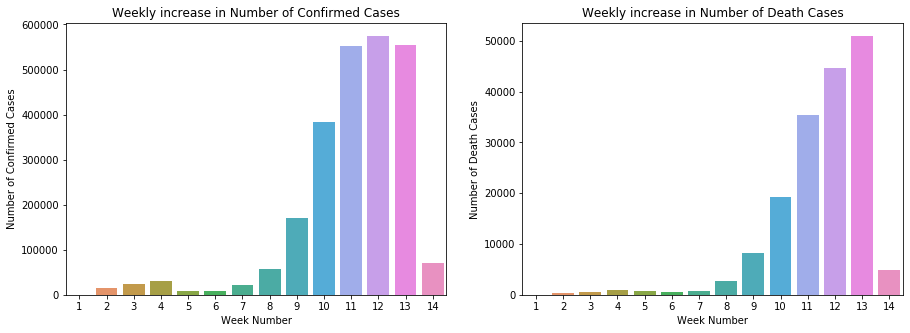

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

Increasing Deaths every week is worrying sign
14th week has just started.

Growth Rate of different types of cases (Confirmed,Recovered,Deaths)

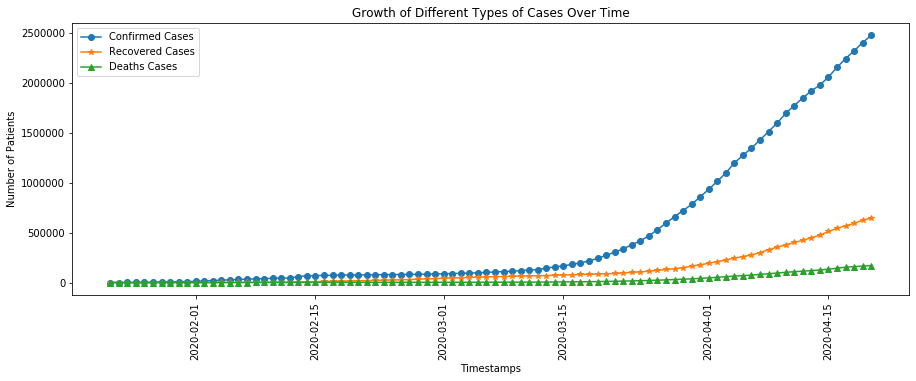

In [16]:
plt.figure(figsize=(15,5))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Deaths Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamps")
plt.xticks(rotation=90)
plt.title("Growth of Different Types of Cases Over Time")
plt.legend()

Moratality and Recovery Rate analysis around the World:

Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

In [17]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Moratality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
datewise["Closed Cases"]=(datewise["Recovered"]+datewise["Deaths"])

print("Average Moratality Rate",datewise["Moratality Rate"].mean())
print("Median Moratality Rate",datewise["Moratality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Moratality Rate 3.8516272442436486
Median Moratality Rate 3.420551684596303
Average Recovery Rate 24.92801797325921
Median Recovery Rate 22.76771496235475


In [18]:
print("Average increase in number of confirmed cases everyday: ", np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday: ", np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of deaths cases everyday: ", np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of confirmed cases everyday:  27463.0
Average increase in number of recovered cases everyday:  7175.0
Average increase in number of deaths cases everyday:  1889.0


Growth Factor :
Growth factor is the factor by which a quantity multiplies itself over time. 
Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign, whereas a growth factor constantly above 1 is the sign of exponential growth.

A growth factor constant at 1 indicates there is no change in any kind of cases.

In [19]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range (datewise.shape[0]-1):
    daily_increase_confirm.append((datewise["Confirmed"].iloc[i+1])/(datewise["Confirmed"].iloc[i]))
    daily_increase_recovered.append((datewise["Recovered"].iloc[i+1])/(datewise["Recovered"].iloc[i]))
    daily_increase_deaths.append((datewise["Deaths"].iloc[i+1])/(datewise["Deaths"].iloc[i]))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)
print("Growth_Factor: ",daily_increase_confirm[i])
print("Growth_Factor: ",daily_increase_recovered[i])
print("Growth_Factor: ",daily_increase_deaths[i])

Growth_Factor:  1.0360779528846615
Growth_Factor:  1.0533226183863762
Growth_Factor:  1.034693749608175


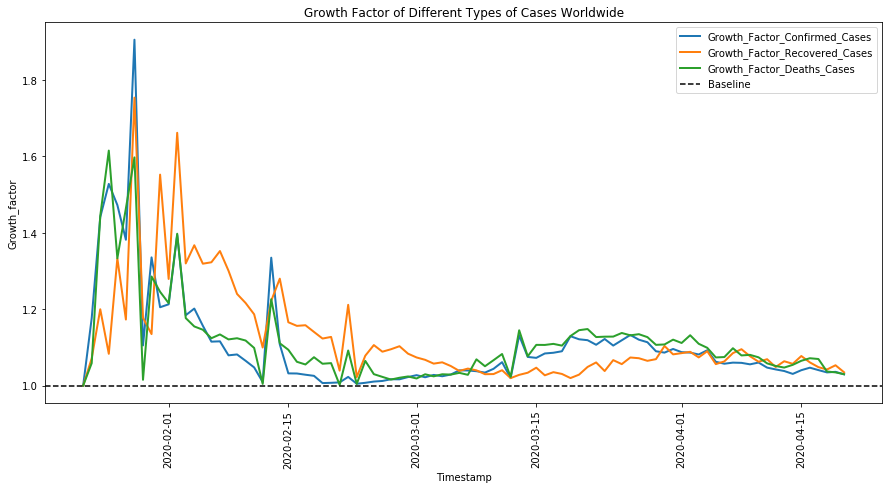

In [20]:
plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth_Factor_Confirmed_Cases",linewidth=2)
plt.plot(datewise.index,daily_increase_recovered,label="Growth_Factor_Recovered_Cases",linewidth=2)
plt.plot(datewise.index,daily_increase_deaths,label="Growth_Factor_Deaths_Cases",linewidth=2)
plt.ylabel("Growth_factor")
plt.xlabel("Timestamp")
plt.title("Growth Factor of Different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()            

Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.